In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import mstats

In [21]:
meta = pd.read_csv("meta_solo_er.csv")
deaths = pd.read_csv("death_solo_er.csv")

In [22]:
death_by_players = deaths.dropna()

In [23]:
death_by_players.head()

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,P92,Adlerx,51.0,391919.3,235406.2,ERANGEL,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,425,Sventy21,59.0,392289.6,235706.1
1,AKM,CocaCola01,4.0,347226.7,142356.4,ERANGEL,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,1477,PNW_Franco17,9.0,345692.8,141435.4
2,P18C,jprodigy,85.0,421634.0,324678.9,ERANGEL,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,126,Eagyl,86.0,421077.3,324661.9
4,UMP9,MLBBear,30.0,420148.7,324679.9,ERANGEL,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,263,Hastela,71.0,420297.3,326671.7
5,S686,JackieCOC,5.0,350512.6,403584.0,ERANGEL,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,187,Satch,79.0,350609.2,403244.2


In [24]:
n = 10000
y = death_by_players['time'].sample(n)

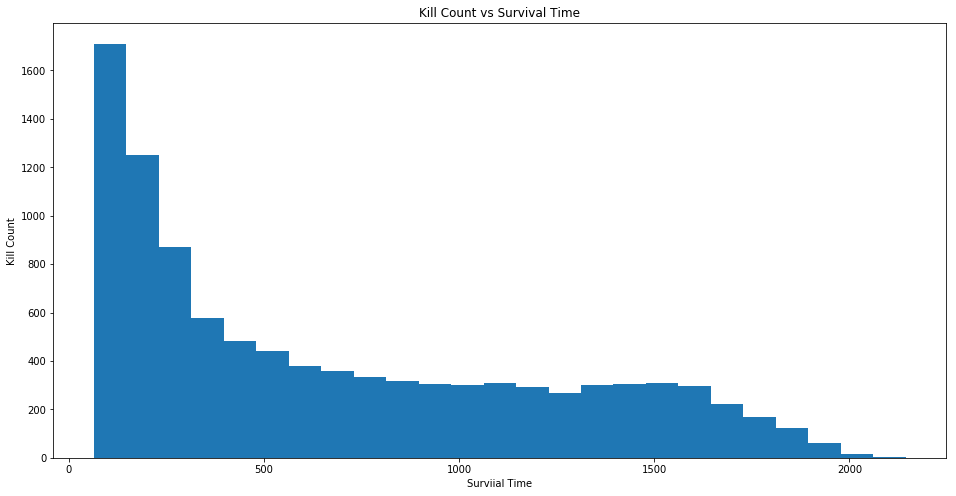

In [35]:
plt.figure(figsize=(16,8))
plt.hist(y,'auto')
plt.title('Kill Count vs Survival Time')
plt.ylabel('Kill Count')
plt.xlabel('Surviial Time')
plt.show()

In [7]:
death_by_players['killed_by'].unique()

array(['P92', 'AKM', 'P18C', 'UMP9', 'S686', 'Kar98k', 'M16A4', 'Punch',
       'M416', 'Micro UZI', 'SCAR-L', 'SKS', 'Falling', 'S1897', 'Mini 14',
       'Hit by Car', 'P1911', 'R1895', 'Grenade', 'S12K', 'AWM',
       'Tommy Gun', 'Crossbow', 'Pan', 'VSS', 'M24', 'Motorbike (SideCar)',
       'Vector', 'Mk14', 'death.Buff_FireDOT_C', 'Crowbar', 'Groza',
       'M249', 'Uaz', 'Sickle', 'DP-28', 'death.ProjMolotov_DamageField_C',
       'Motorbike', 'Buggy', 'Dacia', 'AUG', 'Boat', 'Machete',
       'death.ProjMolotov_C', 'Aquarail'], dtype=object)

In [8]:
meta.head()

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-11-19T08:28:59+0000,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,0.000000,170.954788,0,0,Satch,186.999,100004,79
1,2017-11-19T08:28:59+0000,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,0.000000,66.545590,0,0,osamabinlaggon,124.782,100005,87
2,2017-11-19T08:28:59+0000,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,728.722656,610.168945,124,0,dengboyu76,839.161,100006,35
3,2017-11-19T08:28:59+0000,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,2646.184000,1431.292000,24,0,GOGingmimi,751.716,100007,46
4,2017-11-19T08:28:59+0000,91,2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...,tpp,1,0,0,0.000000,723.102300,100,1,AtomicBrunette,744.088,100011,47


In [45]:
meta_sample = meta.sample(10000)

In [17]:
time_placement = np.vstack(meta[['player_survive_time', 'team_placement']].values)

In [ ]:
cmap = sns.cubehelix_palette(as_cmap=True, dark = 0, light =1, reverse = True)
plt.figure(figsize=(16,8))
plt.title('Survive time')
plt.ylabel('Placement')
plt.xlabel('Survive time')
sns.kdeplot(time_placement[:,0], time_placement[:,1],n_levels=60,shade=True,cmap="Blues")

In [46]:
kill_placement = np.vstack(meta_sample[['player_kills', 'team_placement']].values)

In [47]:
x = kill_placement[:,0]
y = kill_placement[:,1]

In [48]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

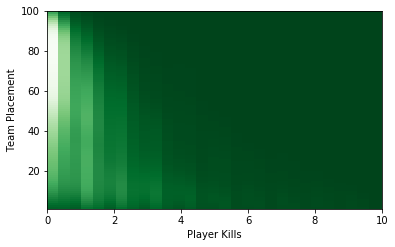

In [64]:
#cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
#ax2 = fig.add_subplot(212)

#ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap="Blues")
#ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap="Blues")
ax1.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap="Greens_r")

ax1.set_xlim(x.min(), 10)
ax1.set_ylim(y.min(), y.max())
#ax2.set_xlim(x.min(), x.max())
#ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Player Kills')
ax1.set_ylabel('Team Placement')

#ax2.set_xlabel('Player Kills')
#ax2.set_ylabel('Team Placement')
plt.show()